# ML Project
Sober ML Engineers
1. Shashank Shekar 
2. Chinthan Chandra

## Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score

In [2]:
columns_description=pd.read_csv("columns_description.csv")

In [3]:
columns_description

,Row,Description,Special
0,SK_ID_CURR,ID of loan in our sample,NaN
1,TARGET,Target variable (1 - client with payment diffi...,NaN
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,CODE_GENDER,Gender of the client,NaN
4,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [4]:
train_data=pd.read_csv("train_data.csv")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

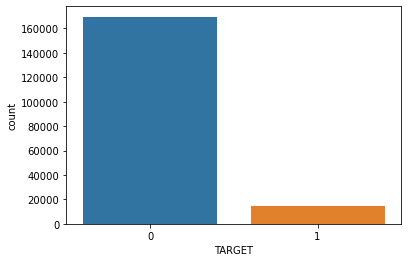

In [5]:
sns.countplot(train_data["TARGET"])

In [6]:
((train_data["TARGET"]==0).sum())/train_data["TARGET"].shape[0]

0.9192709180189262

In [7]:
test_data=pd.read_csv("test_data.csv")

In [8]:
submission=pd.read_csv("./sample_solutions.csv")

## Preprocessing

### Checking for duplicates

In [9]:
train_data.shape

(184506, 122)

In [10]:
test_data.shape

(123005, 121)

In [11]:
train_data.drop_duplicates(inplace=True)

In [12]:
test_data.drop_duplicates(inplace=True)

In [13]:
train_data.shape

(184506, 122)

In [14]:
test_data.shape

(123005, 121)

No duplicates

## Removing Null Values

Checking for the percentage of null values in each column.

In [15]:
Nan_percentage_in_train_data=(train_data.isna().sum()/train_data.shape[0])*100
print(Nan_percentage_in_train_data)

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_WEEK    13.548611
AMT_REQ_CREDIT_BUREAU_MON     13.548611
AMT_REQ_CREDIT_BUREAU_QRT     13.548611
AMT_REQ_CREDIT_BUREAU_YEAR    13.548611
TARGET                         0.000000
Length: 122, dtype: float64


In [16]:
Nan_percentage_in_test_data=(test_data.isna().sum()/test_data.shape[0])*100
print(Nan_percentage_in_test_data)

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.431161
AMT_REQ_CREDIT_BUREAU_WEEK    13.431161
AMT_REQ_CREDIT_BUREAU_MON     13.431161
AMT_REQ_CREDIT_BUREAU_QRT     13.431161
AMT_REQ_CREDIT_BUREAU_YEAR    13.431161
Length: 121, dtype: float64


Dropping the columns which have more than 40% of the data as Nan values.

In [17]:
for column in train_data:
	if(Nan_percentage_in_train_data[column]>40):
		train_data.drop(axis="columns",labels=column,inplace=True)
		test_data.drop(axis="columns",labels=column,inplace=True)

In [18]:
nunu=train_data.nunique()

In [19]:
train_data.shape

(184506, 73)

In [20]:
test_data.shape

(123005, 72)

### Columns with minute null values

Dropping the rows for the columns with very minute null values.

In [21]:
train_data.drop(axis="rows",labels=train_data.index[train_data["AMT_ANNUITY"].isna()],inplace=True) 
train_data.drop(axis="rows",labels=train_data.index[train_data["CNT_FAM_MEMBERS"].isna()],inplace=True)
train_data.drop(axis="rows",labels=train_data.index[train_data["DAYS_LAST_PHONE_CHANGE"].isna()],inplace=True)

For the test data since we can't drop the rows, we impute some value in these minute null value columns. 

In [22]:
test_data["CNT_FAM_MEMBERS"].isna().sum()

1

In [23]:
test_data["CNT_FAM_MEMBERS"].value_counts()

2.0     63184
1.0     27354
3.0     20781
4.0     10038
5.0      1411
6.0       187
7.0        36
8.0         8
9.0         1
12.0        1
13.0        1
20.0        1
15.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

Imputing 2 as it is the majority.

In [24]:
test_data["CNT_FAM_MEMBERS"].fillna(2,inplace=True)

In [25]:
test_data["AMT_ANNUITY"].isna().sum()

6

In [26]:
test_data["AMT_ANNUITY"].describe()

count    122999.000000
mean      27099.750994
std       14531.338692
min        1980.000000
25%       16501.500000
50%       24853.500000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

In [27]:
test_data["AMT_ANNUITY"].fillna(test_data["AMT_ANNUITY"].median(),inplace=True)

### Other Columns

We impute some value to the null values.

#### AMT_REQ_CREDIT_BUREAU_DAY

In [28]:
train_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(dropna=False)

0.0    158582
NaN     24995
1.0       790
2.0        69
3.0        30
4.0        20
6.0         5
5.0         5
8.0         1
9.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [29]:
train_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0,inplace=True)

In [30]:
train_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(dropna=False)

0.0    183577
1.0       790
2.0        69
3.0        30
4.0        20
6.0         5
5.0         5
8.0         1
9.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [31]:
test_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(dropna=False)

0.0    105916
NaN     16521
1.0       502
2.0        37
3.0        15
4.0         6
5.0         4
6.0         3
9.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [32]:
test_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0,inplace=True)

In [33]:
test_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(dropna=False)

0.0    122437
1.0       502
2.0        37
3.0        15
4.0         6
5.0         4
6.0         3
9.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_HOUR

In [34]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False)

0.0    158540
NaN     24995
1.0       923
2.0        33
3.0         6
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [35]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)

In [36]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False)

0.0    183535
1.0       923
2.0        33
3.0         6
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [37]:
test_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False)

0.0    105821
NaN     16521
1.0       637
2.0        23
3.0         3
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [38]:
test_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)

In [39]:
test_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(dropna=False)

0.0    122342
1.0       637
2.0        23
3.0         3
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_WEEK

In [40]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(dropna=False)

0.0    154390
NaN     24995
1.0      4902
2.0       131
3.0        38
4.0        19
6.0        13
5.0         8
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [41]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)

In [42]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(dropna=False)

0.0    179385
1.0      4902
2.0       131
3.0        38
4.0        19
6.0        13
5.0         8
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [43]:
test_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(dropna=False)

0.0    103062
NaN     16521
1.0      3305
2.0        68
3.0        20
4.0        15
6.0         7
8.0         5
5.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [44]:
test_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)

In [45]:
test_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(dropna=False)

0.0    119583
1.0      3305
2.0        68
3.0        20
4.0        15
6.0         7
8.0         5
5.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_MON

In [46]:
train_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(dropna=False)

0.0     133397
NaN      24995
1.0      19751
2.0       3188
3.0       1207
4.0        647
5.0        371
6.0        216
7.0        166
9.0        132
8.0        110
10.0        75
11.0        74
13.0        48
12.0        44
14.0        27
15.0        21
16.0        14
17.0         7
18.0         4
19.0         2
22.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [47]:
train_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)

In [48]:
train_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(dropna=False)

0.0     158392
1.0      19751
2.0       3188
3.0       1207
4.0        647
5.0        371
6.0        216
7.0        166
9.0        132
8.0        110
10.0        75
11.0        74
13.0        48
12.0        44
14.0        27
15.0        21
16.0        14
17.0         7
18.0         4
19.0         2
22.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [49]:
test_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(dropna=False)

0.0     88834
NaN     16521
1.0     13393
2.0      2198
3.0       784
4.0       429
5.0       231
7.0       132
6.0       127
8.0        75
9.0        74
10.0       57
11.0       45
12.0       33
13.0       24
15.0       14
14.0       13
16.0        9
17.0        7
18.0        2
27.0        1
23.0        1
19.0        1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [50]:
test_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)

In [51]:
test_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(dropna=False)

0.0     105355
1.0      13393
2.0       2198
3.0        784
4.0        429
5.0        231
7.0        132
6.0        127
8.0         75
9.0         74
10.0        57
11.0        45
12.0        33
13.0        24
15.0        14
14.0        13
16.0         9
17.0         7
18.0         2
27.0         1
23.0         1
19.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_QRT

In [52]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(dropna=False)

0.0      128997
NaN       24995
1.0       20522
2.0        8626
3.0        1022
4.0         271
5.0          40
6.0          18
8.0           4
7.0           1
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [53]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

In [54]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(dropna=False)

0.0      153992
1.0       20522
2.0        8626
3.0        1022
4.0         271
5.0          40
6.0          18
8.0           4
7.0           1
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [55]:
test_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(dropna=False)

0.0    86416
NaN    16521
1.0    13339
2.0     5786
3.0      695
4.0      205
5.0       24
6.0       10
7.0        6
8.0        3
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [56]:
test_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

In [57]:
test_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(dropna=False)

0.0    102937
1.0     13339
2.0      5786
3.0       695
4.0       205
5.0        24
6.0        10
7.0         6
8.0         3
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_YEAR

In [58]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.0     43204
1.0     37825
2.0     30085
NaN     24995
3.0     20299
4.0     12432
5.0      7196
6.0      4142
7.0      2344
8.0      1263
9.0       645
11.0       18
12.0       16
13.0       10
10.0        9
17.0        3
19.0        3
15.0        3
14.0        2
25.0        1
16.0        1
23.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Count'>

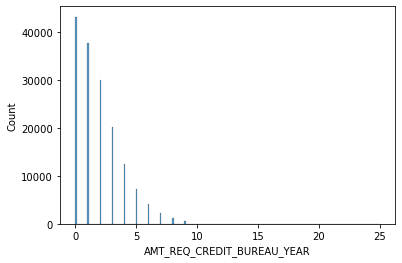

In [59]:
sns.histplot(train_data["AMT_REQ_CREDIT_BUREAU_YEAR"])

Clearly making the null values causes the value 0 to become marginally higher than 1. So we impute this with one of the central tendencies.

In [60]:
train_data["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    159503.000000
mean          1.897419
std           1.864304
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

The mode and median are both 0, so we will use the mean to replace the null values.

In [61]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)

In [62]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.000000     43204
1.000000     37825
2.000000     30085
1.897419     24995
3.000000     20299
4.000000     12432
5.000000      7196
6.000000      4142
7.000000      2344
8.000000      1263
9.000000       645
11.000000       18
12.000000       16
13.000000       10
10.000000        9
17.000000        3
19.000000        3
15.000000        3
14.000000        2
25.000000        1
16.000000        1
23.000000        1
20.000000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

We do the same thing for test data.

In [63]:
test_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.0     28597
1.0     25579
2.0     20106
NaN     16521
3.0     13329
4.0      8281
5.0      4855
6.0      2825
7.0      1525
8.0       864
9.0       451
12.0       14
10.0       13
11.0       12
13.0        9
14.0        8
18.0        4
17.0        4
15.0        3
16.0        2
21.0        1
22.0        1
19.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [64]:
test_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(test_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)

In [65]:
test_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.000000     28597
1.000000     25579
2.000000     20106
1.903676     16521
3.000000     13329
4.000000      8281
5.000000      4855
6.000000      2825
7.000000      1525
8.000000       864
9.000000       451
12.000000       14
10.000000       13
11.000000       12
13.000000        9
14.000000        8
18.000000        4
17.000000        4
15.000000        3
16.000000        2
21.000000        1
22.000000        1
19.000000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

#### OCCUPATION_TYPE

In [66]:
train_data["OCCUPATION_TYPE"].value_counts(dropna=False)

NaN                      57866
Laborers                 32967
Sales staff              19351
Core staff               16491
Managers                 12779
Drivers                  11237
High skill tech staff     6859
Accountants               5896
Medicine staff            5130
Security staff            4073
Cooking staff             3621
Cleaning staff            2766
Private service staff     1565
Low-skill Laborers        1223
Waiters/barmen staff       819
Secretaries                786
Realty agents              434
HR staff                   321
IT staff                   314
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='Count'>

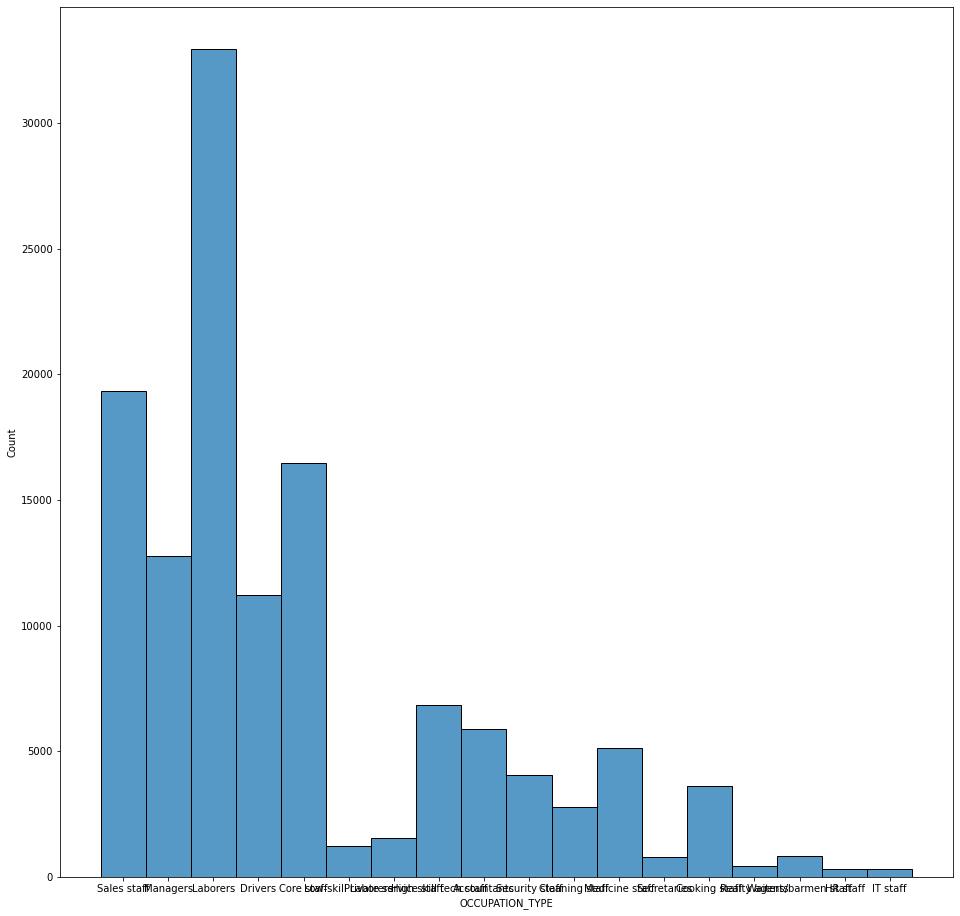

In [67]:
plt.figure(figsize=(16,16))
sns.histplot(train_data["OCCUPATION_TYPE"])

The data is categorical we will just consider the null values as another category. If we have to change the null values to another category this will cause the column to be biased towards one category.

In [68]:
train_data["OCCUPATION_TYPE"].fillna("Unemployed",inplace=True)

In [69]:
train_data["OCCUPATION_TYPE"].value_counts()

Unemployed               57866
Laborers                 32967
Sales staff              19351
Core staff               16491
Managers                 12779
Drivers                  11237
High skill tech staff     6859
Accountants               5896
Medicine staff            5130
Security staff            4073
Cooking staff             3621
Cleaning staff            2766
Private service staff     1565
Low-skill Laborers        1223
Waiters/barmen staff       819
Secretaries                786
Realty agents              434
HR staff                   321
IT staff                   314
Name: OCCUPATION_TYPE, dtype: int64

In [70]:
test_data["OCCUPATION_TYPE"].value_counts(dropna=False)

NaN                      38524
Laborers                 22218
Sales staff              12751
Core staff               11078
Managers                  8591
Drivers                   7365
High skill tech staff     4521
Accountants               3916
Medicine staff            3407
Security staff            2647
Cooking staff             2325
Cleaning staff            1887
Private service staff     1087
Low-skill Laborers         870
Waiters/barmen staff       529
Secretaries                518
Realty agents              317
HR staff                   242
IT staff                   212
Name: OCCUPATION_TYPE, dtype: int64

In [71]:
test_data["OCCUPATION_TYPE"].fillna("Unemployed",inplace=True)

In [72]:
test_data["OCCUPATION_TYPE"].value_counts(dropna=False)

Unemployed               38524
Laborers                 22218
Sales staff              12751
Core staff               11078
Managers                  8591
Drivers                   7365
High skill tech staff     4521
Accountants               3916
Medicine staff            3407
Security staff            2647
Cooking staff             2325
Cleaning staff            1887
Private service staff     1087
Low-skill Laborers         870
Waiters/barmen staff       529
Secretaries                518
Realty agents              317
HR staff                   242
IT staff                   212
Name: OCCUPATION_TYPE, dtype: int64

#### OBS_30CNT_SOCIAL_CIRCLE

In [73]:
train_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      98233
1.0      29319
2.0      17861
3.0      12096
4.0       8516
5.0       5730
6.0       3971
7.0       2660
8.0       1782
9.0       1205
10.0       814
NaN        639
11.0       507
12.0       412
13.0       234
14.0       161
15.0       104
16.0        69
17.0        48
18.0        29
19.0        27
20.0        18
21.0        15
22.0        14
23.0        11
25.0         8
24.0         7
27.0         3
30.0         2
29.0         1
348.0        1
26.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [74]:
train_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [75]:
train_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      98872
1.0      29319
2.0      17861
3.0      12096
4.0       8516
5.0       5730
6.0       3971
7.0       2660
8.0       1782
9.0       1205
10.0       814
11.0       507
12.0       412
13.0       234
14.0       161
15.0       104
16.0        69
17.0        48
18.0        29
19.0        27
20.0        18
21.0        15
22.0        14
23.0        11
25.0         8
24.0         7
27.0         3
30.0         2
29.0         1
348.0        1
26.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [76]:
test_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     65670
1.0     19464
2.0     11947
3.0      8225
4.0      5627
5.0      3823
6.0      2482
7.0      1730
8.0      1185
9.0       798
10.0      562
NaN       382
11.0      345
12.0      240
13.0      177
14.0       97
16.0       64
15.0       62
17.0       40
19.0       17
18.0       17
21.0       14
20.0       12
22.0        8
23.0        4
24.0        4
25.0        3
26.0        2
27.0        2
47.0        1
28.0        1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [77]:
test_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [78]:
train_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      98872
1.0      29319
2.0      17861
3.0      12096
4.0       8516
5.0       5730
6.0       3971
7.0       2660
8.0       1782
9.0       1205
10.0       814
11.0       507
12.0       412
13.0       234
14.0       161
15.0       104
16.0        69
17.0        48
18.0        29
19.0        27
20.0        18
21.0        15
22.0        14
23.0        11
25.0         8
24.0         7
27.0         3
30.0         2
29.0         1
348.0        1
26.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### OBS_60_CNT_SOCIAL_CIRCLE

In [79]:
train_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      98693
1.0      29358
2.0      17846
3.0      12037
4.0       8387
5.0       5676
6.0       3898
7.0       2642
8.0       1733
9.0       1182
10.0       788
NaN        639
11.0       497
12.0       392
13.0       231
14.0       149
15.0       104
16.0        70
17.0        39
18.0        35
19.0        24
20.0        20
22.0        13
21.0        13
23.0        10
24.0         8
25.0         7
27.0         3
29.0         2
344.0        1
30.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [80]:
train_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [81]:
train_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      99332
1.0      29358
2.0      17846
3.0      12037
4.0       8387
5.0       5676
6.0       3898
7.0       2642
8.0       1733
9.0       1182
10.0       788
11.0       497
12.0       392
13.0       231
14.0       149
15.0       104
16.0        70
17.0        39
18.0        35
19.0        24
20.0        20
22.0        13
21.0        13
23.0        10
24.0         8
25.0         7
27.0         3
29.0         2
344.0        1
30.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [82]:
test_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     65966
1.0     19512
2.0     11920
3.0      8177
4.0      5559
5.0      3787
6.0      2451
7.0      1702
8.0      1153
9.0       777
10.0      547
NaN       382
11.0      340
12.0      228
13.0      170
14.0       89
16.0       67
15.0       62
17.0       34
19.0       20
21.0       15
18.0       14
20.0       10
22.0        7
25.0        4
24.0        4
23.0        3
27.0        2
47.0        1
28.0        1
26.0        1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [83]:
test_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [84]:
train_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0      99332
1.0      29358
2.0      17846
3.0      12037
4.0       8387
5.0       5676
6.0       3898
7.0       2642
8.0       1733
9.0       1182
10.0       788
11.0       497
12.0       392
13.0       231
14.0       149
15.0       104
16.0        70
17.0        39
18.0        35
19.0        24
20.0        20
22.0        13
21.0        13
23.0        10
24.0         8
25.0         7
27.0         3
29.0         2
344.0        1
30.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

#### DEF_30_CNT_SOCIAL_CIRCLE"

In [85]:
train_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     162685
1.0      17062
2.0       3162
3.0        745
NaN        639
4.0        155
5.0         38
6.0          9
8.0          1
34.0         1
7.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [86]:
train_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [87]:
train_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     163324
1.0      17062
2.0       3162
3.0        745
4.0        155
5.0         38
6.0          9
8.0          1
34.0         1
7.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [88]:
test_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0    108631
1.0     11266
2.0      2161
3.0       447
NaN       382
4.0        98
5.0        18
6.0         2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [89]:
test_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [90]:
train_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     163324
1.0      17062
2.0       3162
3.0        745
4.0        155
5.0         38
6.0          9
8.0          1
34.0         1
7.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### DEF_60_CNT_SOCIAL_CIRCLE

In [91]:
train_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     168340
1.0      13167
2.0       1871
NaN        639
3.0        378
4.0         84
5.0         14
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [92]:
train_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [93]:
train_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     168979
1.0      13167
2.0       1871
3.0        378
4.0         84
5.0         14
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [94]:
test_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0    112373
1.0      8674
2.0      1299
NaN       382
3.0       220
4.0        51
5.0         6
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [95]:
test_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [96]:
train_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts(dropna=False)

0.0     168979
1.0      13167
2.0       1871
3.0        378
4.0         84
5.0         14
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

#### AMT_GOODS_PRICE

In [97]:
train_data["AMT_GOODS_PRICE"].value_counts()

450000.0     15756
225000.0     15142
675000.0     14779
900000.0      9258
270000.0      6757
             ...  
234342.0         1
660244.5         1
1180273.5        1
225243.0         1
744988.5         1
Name: AMT_GOODS_PRICE, Length: 793, dtype: int64

In [98]:
train_data["AMT_GOODS_PRICE"].isna().sum()

166

In [99]:
train_data["AMT_GOODS_PRICE"].describe()

count    1.843320e+05
mean     5.386932e+05
std      3.692258e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

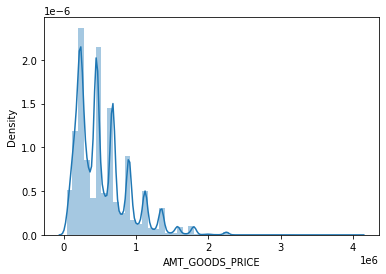

In [100]:
sns.distplot(train_data["AMT_GOODS_PRICE"])

Since there are only 166 null values, we replace them with the mean.

In [101]:
train_data["AMT_GOODS_PRICE"].fillna(train_data["AMT_GOODS_PRICE"].mean(),inplace=True)

In [102]:
train_data["AMT_GOODS_PRICE"].isna().sum()

0

In [103]:
test_data["AMT_GOODS_PRICE"].describe()

count    1.228940e+05
mean     5.379516e+05
std      3.697775e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [104]:
test_data["AMT_GOODS_PRICE"].isna().sum()

111

In [105]:
test_data["AMT_GOODS_PRICE"].fillna(test_data["AMT_GOODS_PRICE"].mean(),inplace=True)

In [106]:
test_data["AMT_GOODS_PRICE"].describe()

count    1.230050e+05
mean     5.379516e+05
std      3.696106e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [107]:
test_data["AMT_GOODS_PRICE"].isna().sum()

0

#### NAME_TYPE_SUITE

In [108]:
train_data["NAME_TYPE_SUITE"].value_counts(dropna=False)

Unaccompanied      149052
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
NaN                   769
Other_A               528
Group of people       173
Name: NAME_TYPE_SUITE, dtype: int64

In [109]:
train_data["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)

In [110]:
train_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      149821
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
Other_A               528
Group of people       173
Name: NAME_TYPE_SUITE, dtype: int64

In [111]:
test_data["NAME_TYPE_SUITE"].value_counts(dropna=False)

Unaccompanied      99467
Family             16105
Spouse, partner     4501
Children            1285
Other_B              689
NaN                  522
Other_A              338
Group of people       98
Name: NAME_TYPE_SUITE, dtype: int64

In [112]:
test_data["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)

In [113]:
test_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      99989
Family             16105
Spouse, partner     4501
Children            1285
Other_B              689
Other_A              338
Group of people       98
Name: NAME_TYPE_SUITE, dtype: int64

#### EXT_SOURCE_3

In [114]:
train_data["EXT_SOURCE_3"].describe()

count    147845.000000
mean          0.510898
std           0.194895
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='Density'>

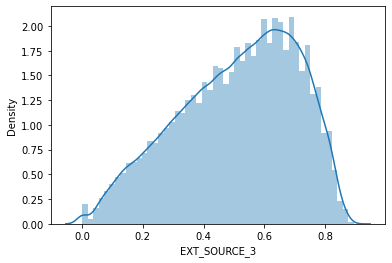

In [115]:
sns.distplot(train_data["EXT_SOURCE_3"])

In [116]:
train_data["EXT_SOURCE_3"].isna().sum()

36653

In [117]:
train_data["EXT_SOURCE_3"].fillna(train_data["EXT_SOURCE_3"].median(),inplace=True)

In [118]:
train_data["EXT_SOURCE_3"].isna().sum()

0

In [119]:
train_data["EXT_SOURCE_3"].describe()

count    184498.000000
mean          0.515741
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

In [120]:
test_data["EXT_SOURCE_3"].describe()

count    98696.000000
mean         0.510791
std          0.194771
min          0.000527
25%          0.370650
50%          0.535276
75%          0.669057
max          0.896010
Name: EXT_SOURCE_3, dtype: float64

In [121]:
test_data["EXT_SOURCE_3"].isna().sum()

24309

In [122]:
test_data["EXT_SOURCE_3"].fillna(test_data["EXT_SOURCE_3"].mean(),inplace=True)

In [123]:
test_data["EXT_SOURCE_3"].isna().sum()

0

#### EXT_SOURCE_2

In [124]:
train_data["EXT_SOURCE_2"].describe()

count    184086.000000
mean          0.514613
std           0.190880
min           0.000001
25%           0.392422
50%           0.565996
75%           0.663798
max           0.855000
Name: EXT_SOURCE_2, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='Density'>

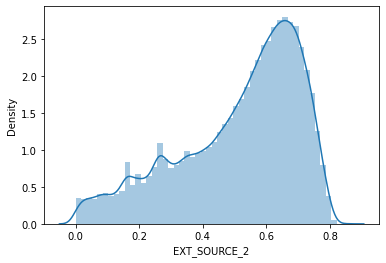

In [125]:
sns.distplot(train_data["EXT_SOURCE_2"])

In [126]:
train_data["EXT_SOURCE_2"].fillna(train_data["EXT_SOURCE_2"].median(),inplace=True)

In [127]:
train_data["EXT_SOURCE_2"].isna().sum()

0

In [128]:
test_data["EXT_SOURCE_2"].describe()

count    1.227580e+05
mean     5.140578e-01
std      1.913316e-01
min      8.173617e-08
25%      3.924913e-01
50%      5.658298e-01
75%      6.632936e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [129]:
test_data["EXT_SOURCE_2"].isna().sum()

247

In [130]:
test_data["EXT_SOURCE_2"].fillna(test_data["EXT_SOURCE_2"].median(),inplace=True)

In [131]:
test_data["EXT_SOURCE_2"].isna().sum()

0

Now we have no null values in our dataset and we can proceed to do further preprocessing.

In [132]:
train_data.isna().sum().sum()

0

In [133]:
test_data.isna().sum().sum()

0

## Outlier removal

In [134]:
train_data_target=train_data["TARGET"]
train_data.drop(axis=1,columns="TARGET",inplace=True)

In [135]:
combined_data=pd.concat([train_data,test_data],axis=0)

In [136]:
combined_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.000000
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.000000
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.000000
3,305311,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.000000
4,414121,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,128638,Cash loans,F,Y,Y,1,117000.0,675000.0,32602.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.000000
123001,169821,Cash loans,F,N,Y,0,225000.0,1006920.0,42790.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.000000
123002,442166,Cash loans,F,N,Y,0,153000.0,625536.0,26851.5,540000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.903676
123003,301605,Cash loans,M,N,Y,0,180000.0,1089000.0,31972.5,1089000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.000000


In [137]:
columns_with_numerical_data=list(combined_data.select_dtypes(['int64','float64']).columns)

In [138]:
# for col in columns_with_numerical_data:
# 	quart1=combined_data[col].quantile(0.25)
# 	quart3=combined_data[col].quantile(0.75)
# 	iqr=quart3-quart1
# 	upper_whisker=quart3+iqr*1.5
# 	lower_whisker=quart1-iqr*1.5
# 	combined_data.loc[combined_data[col]>upper_whisker,col]=upper_whisker
# 	combined_data.loc[combined_data[col]<lower_whisker,col]=lower_whisker

In [139]:
combined_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307503.000000,307503.000000,3.075030e+05,3.075030e+05,307503.000000,3.075030e+05,307503.000000,307503.000000,307503.000000,307503.000000,...,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000,307503.000000
mean,278182.095986,0.417063,1.687969e+05,5.990259e+05,27108.512205,5.383966e+05,0.020868,-16037.082916,63816.743118,-4986.141000,...,0.008127,0.000595,0.000507,0.000335,0.005538,0.006055,0.029720,0.231289,0.229634,1.899922
std,102790.034460,0.722128,2.371255e+05,4.024909e+05,14493.641361,3.692797e+05,0.013831,4363.969621,141277.212245,3522.894235,...,0.089782,0.024388,0.022518,0.018299,0.078015,0.103038,0.190722,0.856817,0.744067,1.738460
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189149.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278204.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.897419
75%,367143.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Encoding

Columns with categorical values have to be encoded.

In [140]:
columns_to_encode=list(train_data.select_dtypes(include=['object']).columns)

The test data has a column in the columns to be encoded whose value is indifferent from the train data column. So we combine and split with randomising.

In [141]:
combined_data_encoded=pd.get_dummies(combined_data,columns=columns_to_encode)

In [142]:
train_data_encoded=combined_data_encoded.iloc[:train_data.shape[0],:]
test_data_encoded=combined_data_encoded.iloc[train_data.shape[0]:,:]

In [143]:
train_data_encoded.shape

(184498, 185)

In [144]:
train_data_encoded=pd.concat([train_data_encoded,train_data_target],axis=1)

In [145]:
train_data_encoded

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
0,450407,1,67500.0,227520.0,11065.5,180000.0,0.018634,-17210,-774,-5580.0,...,0,0,0,0,0,0,0,0,0,0
1,271298,1,247500.0,1882372.5,65560.5,1719000.0,0.018850,-18640,-96,-5711.0,...,0,0,0,0,0,0,0,0,0,0
2,122238,1,180000.0,101880.0,10827.0,90000.0,0.022625,-14649,-6130,-1776.0,...,0,0,0,0,0,0,1,0,0,0
3,305311,0,81000.0,405000.0,20677.5,405000.0,0.035792,-12762,-5891,-6430.0,...,0,0,0,0,0,0,0,0,0,0
4,414121,0,157500.0,888840.0,29506.5,675000.0,0.018801,-16329,-345,-1413.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184501,439663,1,135000.0,143910.0,15498.0,135000.0,0.016612,-12139,-1442,-3888.0,...,0,0,0,0,0,0,0,0,0,0
184502,385689,0,202500.0,360000.0,18000.0,360000.0,0.010032,-22472,365243,-12171.0,...,0,0,0,0,0,0,0,0,1,0
184503,153567,0,135000.0,900000.0,45954.0,900000.0,0.014464,-15037,-88,-5025.0,...,0,0,0,0,0,0,0,0,0,0
184504,365526,0,123300.0,744988.5,20484.0,744988.5,0.026392,-20586,365243,-6310.0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
test_data_encoded.shape

(123005, 185)

## Check for duplicates after dropping columns

In [147]:
train_data_encoded.duplicated().sum()

0

No duplicates found.

## EDA

Now we do further analysis.

In [148]:
columns_with_number_uniques=train_data_encoded.nunique()

We have to check for skews first. Most of our columns are categorical or has less number of unique values. So we have only few columns to check skews for.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

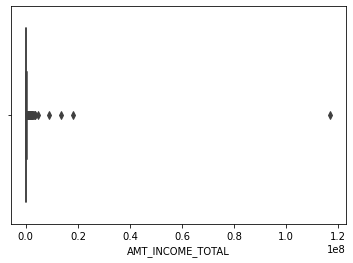

In [149]:
sns.boxplot(train_data_encoded["AMT_INCOME_TOTAL"])

In [150]:
# train_data_encoded=train_data_encoded[train_data_encoded["AMT_INCOME_TOTAL"]<=1e6]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

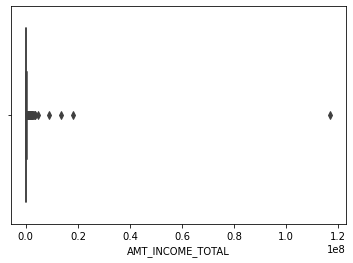

In [151]:
sns.boxplot(train_data_encoded["AMT_INCOME_TOTAL"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

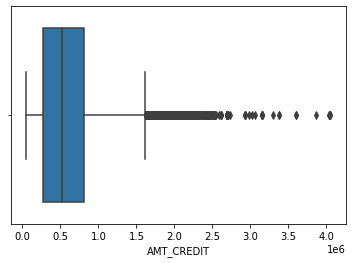

In [152]:
sns.boxplot(train_data_encoded["AMT_CREDIT"])

In [153]:
# train_data_encoded[train_data_encoded["AMT_CREDIT"]>3e6]

In [154]:
# train_data_encoded=train_data_encoded[train_data_encoded["AMT_CREDIT"]<=3e6]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

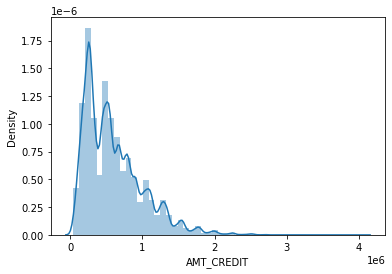

In [155]:
sns.distplot(train_data_encoded["AMT_CREDIT"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

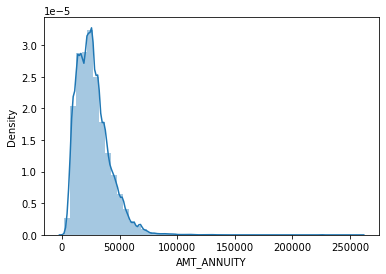

In [156]:
sns.distplot(train_data_encoded["AMT_ANNUITY"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

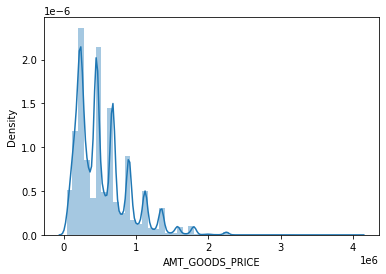

In [157]:
sns.distplot(train_data_encoded["AMT_GOODS_PRICE"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

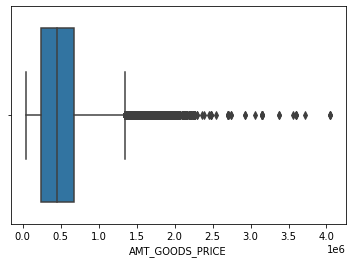

In [158]:
sns.boxplot(train_data_encoded["AMT_GOODS_PRICE"])

In [159]:
# train_data_encoded[train_data_encoded["AMT_GOODS_PRICE"]>3e6]

In [160]:
# train_data_encoded=train_data_encoded[train_data_encoded["AMT_GOODS_PRICE"]<=3e6]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

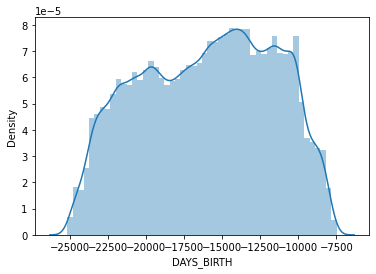

In [161]:
sns.distplot(train_data_encoded["DAYS_BIRTH"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_BIRTH'>

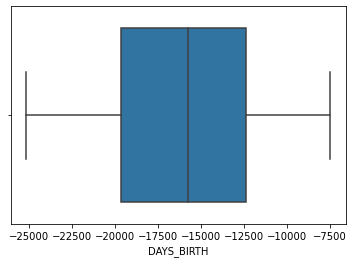

In [162]:
sns.boxplot(train_data_encoded["DAYS_BIRTH"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_ID_PUBLISH'>

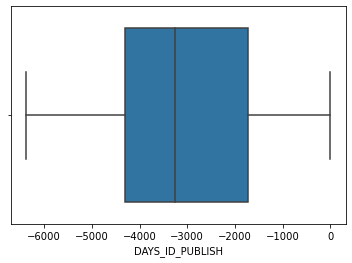

In [163]:
sns.boxplot(train_data_encoded["DAYS_ID_PUBLISH"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_REGISTRATION'>

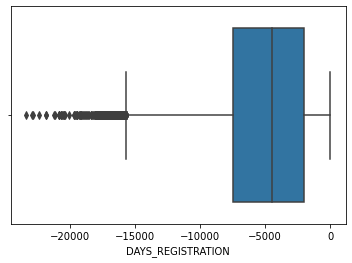

In [164]:
sns.boxplot(train_data_encoded["DAYS_REGISTRATION"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXT_SOURCE_2'>

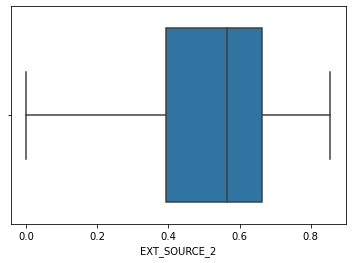

In [165]:
sns.boxplot(train_data_encoded["EXT_SOURCE_2"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

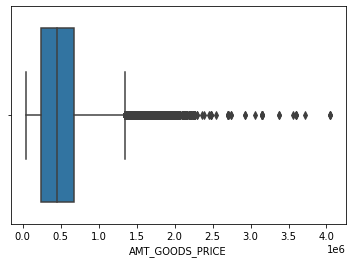

In [166]:
sns.boxplot(train_data_encoded["AMT_GOODS_PRICE"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

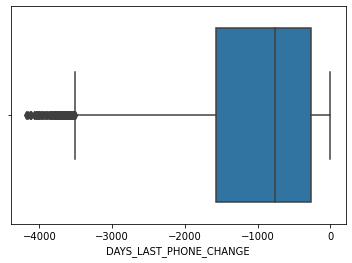

In [167]:
sns.boxplot(train_data_encoded["DAYS_LAST_PHONE_CHANGE"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

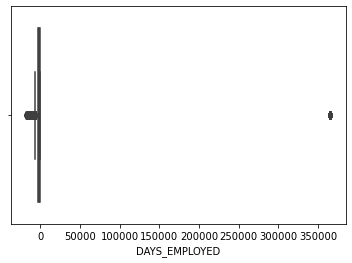

In [168]:
sns.boxplot(train_data_encoded["DAYS_EMPLOYED"])

In [169]:
# sns.heatmap(data=train_data_encoded.corr())

In [170]:
train_data_encoded["DAYS_EMPLOYED"].nunique()

11404

In [171]:
train_data_target=train_data_encoded["TARGET"]
train_data_encoded.drop(axis=1,columns="TARGET",inplace=True)

# Scaling


In [172]:
from sklearn.preprocessing import StandardScaler
instance_of_standard_scaler=StandardScaler()
train_data_standardized=instance_of_standard_scaler.fit_transform(train_data_encoded) 
test_data_standardized=instance_of_standard_scaler.transform(test_data_encoded)

# Sampling (Commented)

In [173]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import CondensedNearestNeighbour

In [174]:
# smote=SMOTE(random_state=42,sampling_strategy=0.3,n_jobs=-1)

In [175]:
# train_data_target.value_counts()

In [176]:
# train_data_stand_resampled,train_data_target_resampled=smote.fit_resample(train_data_standardized,train_data_target)

In [177]:
# train_data_target_resampled.value_counts()

In [178]:
# cnn=CondensedNearestNeighbour(n_jobs=-1,random_state=42)

In [179]:
# train_data_target_resampled.value_counts()

In [180]:
# train_data_stand_resampled,train_data_target_resampled=cnn.fit_resample(train_data_stand_resampled,train_data_target_resampled)

In [181]:
# train_data_target_resampled.value_counts()

# Train Test Split

In [182]:
from sklearn.model_selection import train_test_split
train_data_split,train_data_split_test,train_data_split_y,train_data_split_test_y=train_test_split(
	train_data_standardized,
	train_data_target,
	# train_data_stand_resampled,
	# train_data_target_resampled,
	test_size=0.2,random_state=42)

# LightGBM

In [183]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [184]:
instance_of_lgbm=LGBMClassifier(verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves=800,
         feature_fraction=0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq=1,
         min_child_samples=20,
         learning_rate= 0.005,
         n_estimators=1300,
         class_weight= 'balanced'
         )

In [185]:
instance_of_lgbm.fit(train_data_split,train_data_split_y)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=0.0007099817067951657, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007099817067951657
[LightGBM] [Warning] bagging_fraction is set=0.9938087600649544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9938087600649544
[LightGBM] [Warning] lambda_l2 is set=2.2721620492879536e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2721620492879536e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.9938087600649544, bagging_freq=1,
               class_weight='balanced', feature_fraction=0.4,
               feature_pre_filter=False, lambda_l1=0.0007099817067951657,
               lambda_l2=2.2721620492879536e-07, learning_rate=0.005,
               n_estimators=1300, num_leaves=800,
               objective_type='cross-entropy', verbosity=-1)

In [186]:
predicted_target_for_train_data_in_lgb=instance_of_lgbm.predict(train_data_split_test)

In [187]:
print("Accuracy for the train(test) data for lgb is:",accuracy_score(train_data_split_test_y,predicted_target_for_train_data_in_lgb))
print("f1 score for the train(test) data for lgb is:",f1_score(train_data_split_test_y,predicted_target_for_train_data_in_lgb,average="macro"))

Accuracy for the train(test) data for lgb is: 0.8736585365853659
f1 score for the train(test) data for lgb is: 0.6144469073221698


In [188]:
trainpred=instance_of_lgbm.predict(train_data_split)

In [189]:
print("Accuracy for the train(train) data for lgb is:",accuracy_score(train_data_split_y,trainpred))
print("f1 score for the train(train) data for lgb is:",f1_score(train_data_split_y,trainpred,average="macro"))

Accuracy for the train(train) data for lgb is: 0.9565576769332917
f1 score for the train(train) data for lgb is: 0.8821092300367452


In [190]:
instance_for_submission_lgb=LGBMClassifier(verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves=800,
         feature_fraction=0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq=1,
         min_child_samples=20,
         learning_rate= 0.005,
         n_estimators=1300,
         class_weight= 'balanced'
         )

Fitting the full data

In [191]:
instance_for_submission_lgb.fit(
	# train_data_stand_resampled,train_data_target_resampled
	train_data_standardized,
	train_data_target
	)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] lambda_l1 is set=0.0007099817067951657, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007099817067951657
[LightGBM] [Warning] bagging_fraction is set=0.9938087600649544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9938087600649544
[LightGBM] [Warning] lambda_l2 is set=2.2721620492879536e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2721620492879536e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.9938087600649544, bagging_freq=1,
               class_weight='balanced', feature_fraction=0.4,
               feature_pre_filter=False, lambda_l1=0.0007099817067951657,
               lambda_l2=2.2721620492879536e-07, learning_rate=0.005,
               n_estimators=1300, num_leaves=800,
               objective_type='cross-entropy', verbosity=-1)

Seeing important features

In [192]:
features_important=pd.DataFrame([train_data_encoded.columns,instance_for_submission_lgb.feature_importances_])

In [193]:
sorted_features_importance=features_important.T.sort_values(by=1,ascending=False)
sorted_features_importance.head(20)

,0,1
9,DAYS_REGISTRATION,65077
0,SK_ID_CURR,63770
10,DAYS_ID_PUBLISH,62880
33,DAYS_LAST_PHONE_CHANGE,59209
7,DAYS_BIRTH,58951
4,AMT_ANNUITY,57100
3,AMT_CREDIT,53778
27,EXT_SOURCE_2,50255
8,DAYS_EMPLOYED,50233
28,EXT_SOURCE_3,46841


In [194]:
complete_train_data_pred=instance_for_submission_lgb.predict(train_data_standardized)

In [195]:
print("Accuracy for the train(total) data for lgb is:",accuracy_score(train_data_target,complete_train_data_pred))
print("f1 score for the train(total) data for lgb is:",f1_score(train_data_target,complete_train_data_pred,average="macro"))

Accuracy for the train(total) data for lgb is: 0.9364166549230886
f1 score for the train(total) data for lgb is: 0.8408228435960925


### Best submission 

In [196]:
predicted_target_for_test_data_in_lgbm=instance_for_submission_lgb.predict(test_data_standardized)

In [197]:
count_of_0_in_lgbm=(predicted_target_for_test_data_in_lgbm==0).sum()
count_of_0_in_lgbm

108937

In [198]:
count_of_1_in_lgbm=(predicted_target_for_test_data_in_lgbm==1).sum()
count_of_1_in_lgbm

14068

In [199]:
submission["TARGET"]=predicted_target_for_test_data_in_lgbm

In [200]:
submission.to_csv("./my_submission_lgbm_final.csv",index=False)

instance_for_submission_lgb=LGBMClassifier(verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves=800,
         feature_fraction=0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq=1,
         min_child_samples=20,
         learning_rate= 0.005,
         n_estimators=1300,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.9364166549230886

f1 score for the train(total) data for lgb is: 0.8408228435960925 

kaggle: 0.60775


### Hit and try parameters tried without resampling and outlier removal

LGBMClassifier(verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves=800,
         feature_fraction=0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq=1,
         min_child_samples=30,
         learning_rate= 0.005,
         n_estimators=1300,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.9341152345975035

f1 score for the train(total) data for lgb is: 0.8365326318172227

kaggle score: 0.60612

LGBMClassifier(verbosity = -1,
        #  feature_pre_filter = False,
         objective_type="cross-entropy",
        #  num_iterations = 10000,
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves=800,
         feature_fraction=0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq=1,
         min_child_samples=50,
         learning_rate= 0.005,
         n_estimators=1500,
         class_weight= 'balanced'
         )


Accuracy for the train(total) data for lgb is: 0.9427732902238835

f1 score for the train(total) data for lgb is: 0.8531109845800675

kaggle score: 0.60516

### Few results on hit and try parameters with resampling and outlier correction data.




LGBMClassifier(
       verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         bagging_freq=1,
         min_child_samples=300,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.8984739905716161

f1 score for the train(total) data for lgb is: 0.6056715012686482

kaggle score: 0.58979

LGBMClassifier(
       verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         bagging_freq=1,
         n_estimators=1000,
         min_child_samples=300,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.910386954328214

f1 score for the train(total) data for lgb is: 0.6828407863874724

LGBMClassifier(
       verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         bagging_freq=1,
         n_estimators=2000,
         min_child_samples=250,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.9248550209670332

f1 score for the train(total) data for lgb is: 0.7483159081222445

kaggle score: 0.58211

LGBMClassifier(
        verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
        # # #  num_iterations = 10000,
        # #  lambda_l1= 0.0007099817067951657,
        # #  lambda_l2= 2.2721620492879536e-07,
        #  num_leaves=512,
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         n_estimators=1500,
         class_weight= 'balanced'
         )
				 
Accuracy for the train(total) data for lgb is: 0.9049621074445173

f1 score for the train(total) data for lgb is: 0.6089854136365465

kaggle score=0.5812

instance_for_submission_lgb=LGBMClassifier(
       verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         n_estimators=1500,
         min_child_samples=200,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.9411404113118907

f1 score for the train(total) data for lgb is: 0.7793209512201487

kaggle score=0.57633

LGBMClassifier(
        verbosity = -1,
         feature_pre_filter = False,
         objective_type="cross-entropy",
         feature_fraction=0.2,
         bagging_fraction= 0.2,
         n_estimators=1000,
         class_weight= 'balanced'
         )

Accuracy for the train(total) data for lgb is: 0.9305565350417985

f1 score for the train(total) data for lgb is: 0.7326667787846357

# Other models tried

## Logistic Regression

In [201]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,f1_score
# instance_of_LogisticRegression=LogisticRegression(solver="lbfgs",max_iter=10000,C=100)#,penalty="elasticnet")
# instance_of_LogisticRegression.fit(train_data_split,train_data_split_y)

In [202]:
# train_data_split_test_ypred=instance_of_LogisticRegression.predict(train_data_split_test)

In [203]:
# print("Accuracy for the train(test) data for logistic regression is:",accuracy_score(train_data_split_test_y,train_data_split_test_ypred))
# print("f1 score for the train(test) data for logistic regression is:",f1_score(train_data_split_test_y,train_data_split_test_ypred,average="macro"))

In [204]:
# train_data_pred=instance_of_LogisticRegression.predict(train_data_standardized)

In [205]:
# print("Accuracy for the train(total) data for logistic regression is:",accuracy_score(train_data_target,train_data_pred))
# print("f1 score for the train(total) data for logistic regression is:",f1_score(train_data_target,train_data_pred,average="macro"))

In [206]:
# predicted_target_for_test_data_in_logistic_regression=instance_of_LogisticRegression.predict(test_data_standardized)

In [207]:
# count_of_0_in_logistic_regression=(predicted_target_for_test_data_in_logistic_regression==0).sum()
# count_of_0_in_logistic_regression

In [208]:
# count_of_1_in_logistic_regression=(predicted_target_for_test_data_in_logistic_regression==1).sum()
# count_of_1_in_logistic_regression

In [209]:
# submission["TARGET"]=predicted_target_for_test_data_in_logistic_regression

In [210]:
# submission.to_csv("./my_submission_logistic_regression_sampled.csv",index=False)

## Naive Bayes

In [211]:
# from sklearn.naive_bayes import GaussianNB
# instance_of_gnb=GaussianNB()
# instance_of_gnb.fit(train_data_standardized,train_data_target)

In [212]:
# train_data_split_test_ypred=instance_of_gnb.predict(train_data_split_test)

In [213]:
# print("Accuracy for the train data for naive bayes is:",accuracy_score(train_data_split_test_y,train_data_split_test_ypred))
# print("f1 score for the train data for naive bayes is:",f1_score(train_data_split_test_y,train_data_split_test_ypred,average="micro"))

In [214]:
# predicted_target_for_test_data_in_naive_bayes=instance_of_gnb.predict(test_data_standardized)

In [215]:
# count_of_0_in_naive_bayes=(predicted_target_for_test_data_in_naive_bayes==0).sum()
# count_of_0_in_naive_bayes

In [216]:
# count_of_1_in_naive_bayes=(predicted_target_for_test_data_in_naive_bayes==1).sum()
# count_of_1_in_naive_bayes

In [217]:
# submission["TARGET"]=predicted_target_for_test_data_in_naive_bayes

In [218]:
# submission.to_csv("./my_submission_naive_bayes.csv",index=False)

## Decision tree 

In [219]:
# from sklearn.tree import DecisionTreeClassifier
# instance_of_tree_classifier=DecisionTreeClassifier(random_state=42,max_features="auto",max_depth=24,criterion="entropy")
# instance_of_tree_classifier.fit(train_data_split,train_data_split_y)

In [220]:
# predicted_target_for_train_data_in_decision_trees=instance_of_tree_classifier.predict(train_data_split_test)

In [221]:
# print("Accuracy for the train data for deision trees is:",accuracy_score(train_data_split_test_y,predicted_target_for_train_data_in_decision_trees))
# print("f1 score for the train data for decision trees is:",f1_score(train_data_split_test_y,predicted_target_for_train_data_in_decision_trees,average="macro"))

In [222]:
# trainpredy=instance_of_tree_classifier.predict(train_data_standardized)

In [223]:
# print("Accuracy for the train data for deision trees is:",accuracy_score(train_data_target,trainpredy))
# print("f1 score for the train data for decision trees is:",f1_score(train_data_target,trainpredy,average="macro"))

In [224]:
# predicted_target_for_test_data_in_decision_trees=instance_of_tree_classifier.predict(test_data_standardized)

In [225]:
# count_of_0_in_decision_trees=(predicted_target_for_test_data_in_decision_trees==0).sum()
# count_of_0_in_decision_trees

In [226]:
# count_of_1_in_decision_trees=(predicted_target_for_test_data_in_decision_trees==1).sum()
# count_of_1_in_decision_trees

In [227]:
# submission["TARGET"]=predicted_target_for_test_data_in_decision_trees

In [228]:
# submission.to_csv("./my_submission_decision_trees_resampled2.csv",index=False)

In [229]:
# (pd.read_csv("./my_submission_decision_trees_resampled1.csv")["TARGET"]==1).sum()

## SVM

In [230]:
# from sklearn.svm import SVC

In [231]:
# svm_clf=SVC(C=0.005,kernel="rbf",gamma="scale",random_state=42)

In [232]:
# svm_clf.fit(train_data_split,train_data_split_y)

In [233]:
# predicted_target_for_train_data_in_svm=svm_clf.predict(train_data_split_test)

In [234]:
# from sklearn.metrics import accuracy_score, f1_score

In [235]:
# print("Accuracy for the train data for svm is:",accuracy_score(train_data_target,predicted_target_for_train_data_in_svm))
# print("f1 score for the train data for svm is:",f1_score(train_data_target,predicted_target_for_train_data_in_svm,average="macro"))

In [236]:
# predicted_target_for_test_data_in_svm=svm_clf.predict(test_data_standardized)

In [237]:
# count_of_0_in_svm=(predicted_target_for_test_data_in_svm==0).sum()
# count_of_0_in_svm

In [238]:
# count_of_1_in_svm=(predicted_target_for_test_data_in_svm==1).sum()
# count_of_1_in_svm

In [239]:
# submission["TARGET"]=predicted_target_for_test_data_in_svm

In [240]:
# submission.to_csv("./my_submission_svm.csv",index=False)

## XGBoost

In [241]:
# params={
#     "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.10], 
#     "max_depth":[7,8,9,10,11,12,15],
#     "min_child_weight":[1,2,3],
#     "gamma":[0.7,0.9,0.93,0.95,0.97,0.99],
#     "colsample_bytree":[0.3,0.4,0.5,0.6,0.7]
# }

In [242]:
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# import xgboost

In [243]:
# classifier=xgboost.XGBClassifier()

In [244]:
# random_search=RandomizedSearchCV(classifier,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [245]:
# random_search.fit(train_data_standardized,train_data_target)

In [246]:
# random_search.best_estimator_

In [247]:
# random_search.best_params_

In [248]:
# classifier=xgboost.XGBClassifier(learning_rate =0.02,
# n_estimators=5000,
# min_child_weight=1,
# objective= 'binary:logistic', 
# nthread=8,
# eval_metric="logloss",
# scale_pos_weight=1, 
# seed=42)

In [249]:
# classifier.fit(train_data_split,train_data_split_y)

classifier=xgboost.XGBClassifier(learning_rate =0.02,
n_estimators=10000,
objective= 'binary:logistic', 
nthread=8,
eval_metric="logloss",
scale_pos_weight=2, 
seed=42)



(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.12, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, nthread=8, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.5, seed=42, subsample=0.9192709180189262,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy for the train data for xgb is: 0.9999186983056727 

f1 score for the train data for xgb is: 0.9997260013509839

kaggle: 0.52381

In [250]:
# predicted_target_for_train_data_in_xgb=classifier.predict(train_data_split_test)

In [251]:
# print("Accuracy for the train data for xgb is:",accuracy_score(train_data_split_test_y,predicted_target_for_train_data_in_xgb))
# print("f1 score for the train data for xgb is:",f1_score(train_data_split_test_y,predicted_target_for_train_data_in_xgb,average="macro"))

In [252]:
# trainpred=classifier.predict(train_data_split)

In [253]:
# print("Accuracy for the train data for xgb is:",accuracy_score(train_data_split_y,trainpred))
# print("f1 score for the train data for xgb is:",f1_score(train_data_split_y,trainpred,average="macro"))

In [254]:
# predicted_target_for_test_data_in_xgb=classifier.predict(test_data_standardized)

In [255]:
# count_of_0_in_xgb=(predicted_target_for_test_data_in_xgb==0).sum()
# count_of_0_in_xgb

In [256]:
# count_of_1_in_xgb=(predicted_target_for_test_data_in_xgb==1).sum()
# count_of_1_in_xgb

In [257]:
# submission["TARGET"]=predicted_target_for_test_data_in_xgb

In [258]:
# submission.to_csv("./my_submission_xgb_resampled.csv",index=False)

## Random Forest

In [259]:
# from sklearn.ensemble import RandomForestClassifier

In [260]:
# n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
#                'max_depth': max_depth, 'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

# random_forest_clf = RandomForestClassifier(random_state=42)

# random_forest_clf_cv = RandomizedSearchCV(estimator=random_forest_clf, scoring='f1_macro',param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [261]:
# random_forest_clf_cv.fit(train_data_standardized,train_data_target)

In [262]:
# random_forest_clf_cv.best_estimator_

In [263]:
# random_forest_clf_best=RandomForestClassifier( max_depth=16,max_features='sqrt', n_estimators=2000,random_state=42,n_jobs=-1)

In [264]:
# random_forest_clf_best.fit(train_data_standardized,train_data_target)

In [265]:
# predicted_target_for_train_data_in_random_forest_best=random_forest_clf_best.predict(train_data_split_test)

In [266]:
# print("Accuracy for the train(test) data for rfb is:",accuracy_score(train_data_split_test_y,predicted_target_for_train_data_in_random_forest_best))
# print("f1 score for the train(test) data for rfb is:",f1_score(train_data_split_test_y,predicted_target_for_train_data_in_random_forest_best,average="macro"))

In [267]:
# trainpred=random_forest_clf_best.predict(train_data_split)

In [268]:
# print("Accuracy for the train data for rfb is:",accuracy_score(train_data_split_y,trainpred))
# print("f1 score for the train data for rfb is:",f1_score(train_data_split_y,trainpred,average="macro"))

In [269]:
# predicted_target_for_train_data_full_in_random_forest_best=random_forest_clf_best.predict(train_data_standardized)

In [270]:
# print("Accuracy for the train data for rfb is:",accuracy_score(train_data_target,predicted_target_for_train_data_full_in_random_forest_best))
# print("f1 score for the train data for rfb is:",f1_score(train_data_target,predicted_target_for_train_data_full_in_random_forest_best,average="macro"))

In [271]:
# predicted_target_for_test_data_in_random_forest_best=random_forest_clf_best.predict(test_data_standardized)

In [272]:
# count_of_0_in_xgb=(predicted_target_for_test_data_in_random_forest_best==0).sum()
# count_of_0_in_xgb

In [273]:
# count_of_1_in_xgb=(predicted_target_for_test_data_in_random_forest_best==1).sum()
# count_of_1_in_xgb

In [274]:
# submission["TARGET"]=predicted_target_for_test_data_in_random_forest_best

In [275]:
# submission.to_csv("./my_submission_random_forest_best_clf.csv",index=False)